In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def choose_direction() -> np.array:
    dirs = np.array([[0,1],[0,-1],[1,0],[-1,0]])
    return dirs[random.randrange(4)]

In [363]:
def generate_people(count, start_index):
    people = {}
    for i in range(start_index, count):
        people[i] = {}
        people[i]['coords'] = np.full(
            (1, 2),
            [random.randint(0, 2),
             random.randint(0, 2)]
        )
        people[i]['state'] = 0
    return people

In [ ]:
def distribute_start(centre_point):
    

In [475]:
import random
import math

def random_starts(circle_r,circle_x,circle_y):
    starting_points = []
    for i in range(250):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.random())
        x = abs(math.floor(r * math.cos(alpha) + circle_x))
        y = abs(math.floor(r * math.sin(alpha) + circle_y))
        if [x,y] not in starting_points:
            starting_points.append([x,y])
        else:
            random_starts(circle_r,circle_x,circle_y)
    return starting_points

In [479]:
group_1 = random_starts(250,250,250)
group_1
group_2 = random_starts(250,750,750)

In [480]:
coords_1 = np.array(group_1)
coords_2 = np.array(group_2)
coords = np.append(coords_1, coords_2, axis=0)

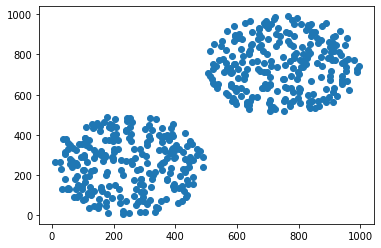

In [481]:
plt.scatter(coords[:,0], coords[:,1])

In [353]:
def check_boundary(coords_to_check):
    bottom_left = [0,0]
    top_right = [10,10]
    if (coords_to_check[0] >= bottom_left[0] and 
        coords_to_check[0] <= top_right[0] and 
        coords_to_check[1] >= bottom_left[1] and 
        coords_to_check[1] <= top_right[1]):
        return True
    return False

In [354]:
def take_step(index: int) -> None:
    new_coords = [guys[index]['coords'][-1] + choose_direction()]
    if check_boundary(new_coords[-1]) and check_wall_collision(new_coords):
        guys[index]['coords'] = np.append(guys[index]['coords'], new_coords, axis=0)
        print(f"GOOD COORDS: {new_coords}")
    else: 
        print(f"BAD COORDS: {new_coords}")
        take_step(index)

In [355]:
def make_wall(start, end):
    """Can only do 90* or 45*"""
    start_x = start[0]
    end_x = end[0]
    start_y = start[1]
    end_y = end[1]
    xs = []
    ys = []
    for i in range(start_x, end_x + 1):
        xs.append(i)
    for i in range(start_y, end_y + 1):
        ys.append(i)
    if len(xs) > len(ys):
        for _ in range(len(xs) - 1):
            ys.append(ys[0])
    if len(ys) > len(xs):
        for _ in range(len(ys) - 1):
            xs.append(xs[0])
    return np.array(list(zip(xs, ys)))

In [356]:
def check_wall_collision(coords_to_check):
    for wall in walls:
        for coords in wall:
            if coords_to_check[0].all() == coords.all():
                return False
    return True

In [357]:
wall = make_wall([2,1], [2,4])
wall

array([[2, 1],
       [2, 2],
       [2, 3],
       [2, 4]])

In [358]:
walls = [wall]

In [359]:
guy = {'coords': np.full((1,2),[0,0]), 'state': 0}
yug = {'coords': np.full((1,2),[1,1]), 'state': 1}
guys = {0:guy,1:yug}
guys

{0: {'coords': array([[0, 0]]), 'state': 0},
 1: {'coords': array([[1, 1]]), 'state': 1}}

In [360]:
for i in range(10):
    take_step(0)

GOOD COORDS: [array([1, 0])]
BAD COORDS: [array([1, 1])]
GOOD COORDS: [array([2, 0])]
BAD COORDS: [array([ 2, -1])]
GOOD COORDS: [array([1, 0])]
GOOD COORDS: [array([0, 0])]
GOOD COORDS: [array([1, 0])]
GOOD COORDS: [array([0, 0])]
GOOD COORDS: [array([0, 1])]
BAD COORDS: [array([-1,  1])]
BAD COORDS: [array([-1,  1])]
GOOD COORDS: [array([0, 2])]
GOOD COORDS: [array([0, 1])]
BAD COORDS: [array([-1,  1])]
GOOD COORDS: [array([0, 0])]


In [362]:
guys[0]

{'coords': array([[0, 0],
        [1, 0],
        [2, 0],
        [1, 0],
        [0, 0],
        [1, 0],
        [0, 0],
        [0, 1],
        [0, 2],
        [0, 1],
        [0, 0]]),
 'state': 0}

In [86]:
print(people[4])
for i in range(5):
    take_step(4)
print(people[4])

{'coords': array([[0, 1]]), 'state': 0}
CURRENT COORDS: [[0 1]]
NEW COORDS? [1 1]
It's OK


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [48]:
def check_contact(index: int) -> None:
    for key in people.keys():
        if key <= index:
            continue
        if np.array_equal(people[index]['coords'], people[key]['coords']):
            check_states(index, key)

In [44]:
def check_states(index: int, key: int) -> None:
    person_a = people[index]
    person_b = people[key]
    if person_a['state'] == 1 and person_b['state'] == 0:
        bite(key)
    elif person_a['state'] == 0 and person_b['state'] == 1:
        bite(index)

In [45]:
def bite(index):
    print(index)
    print("BITTEN")

In [49]:
for i in people.keys():
    check_contact(i)

2
BITTEN
3
BITTEN


In [124]:
a = np.full((1,2),[0,0])

In [125]:
a

array([[0, 0]])

In [126]:
b = np.full((1,2),[1,1])

In [138]:
np.append(a,b,axis=0)

array([[0, 0],
       [1, 1]])

array([[0, 0]])

In [31]:
# people = generate_people(5)
people[0]['state'] = 1
people

{0: {'coords': array([[2, 1]]), 'state': 1},
 1: {'coords': array([[1, 0]]), 'state': 0},
 2: {'coords': array([[2, 1]]), 'state': 0},
 3: {'coords': array([[2, 1]]), 'state': 0},
 4: {'coords': array([[0, 1]]), 'state': 0}}